<a href="https://colab.research.google.com/github/rhirwa/titanic-ship/blob/main/titanic_spaceship_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'spaceship-titanic:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F34377%2F3220602%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240417%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240417T234913Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3Db0223e7c99d463552c39b64ec05c817bad12904a05d25cbc84e38912771984d174d9cf3ed548bff39c2fbf6b51d3189f3f0ff6eab433d104a008e9e0298993cb4c97c00f97394bc2c10ce053987efa9a95c367472081bc63706f554db0a281cf5aaac55275345267fa724450432aa7c31dcc426f3d78ec390672bc5d665f7a40c4407e469987f348d91b144c813782e944ba514e01fb726845d9a4c5a8ea109bf58e702b2daabe35ea9dcf23e4b5226004729e002945486266d8573e6c8009246a295f925fcdaa31cd582611eb3620e9cb29e79ab86a8568cdc3526c85896dce5690c9586b73f77faa4f0e8ca4ed528f2860c9ebda55bd24c64b7aee0ef89610'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [ ]:
#import more libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
train_set = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', index_col='PassengerId') #import train dataset
test_set = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', index_col='PassengerId') #import test set
submission_set = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv') #import submission set

In [ ]:
#View top 5 rows
train_set.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
test_set = test_set.reset_index()
submission_id = test_set['PassengerId'] #set ids for submission
test_set = test_set.set_index('PassengerId')

In [ ]:
#View final submission expectation
submission_set.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


Data exploration analysis on the train set along with necessary preprocessing.

In [ ]:
#Check data types, non-null values, and dataset shape
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [ ]:
#Further check null values
train_set.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We can use Seaborn heatmaps to visualize null values' locations in the dataset.

In [ ]:
# check stats
train_set.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


In [ ]:
#Fill NaN values.
def fill_nan(dataset):
    if 'Transported' in dataset.columns:
        dataset.drop('Transported', axis=1, inplace=True)
    else:
        pass

    for col in dataset.columns:
        if dataset[col].dtypes == 'object':
            dataset[col].fillna(dataset[col].mode()[0], inplace=True)
        else:
            dataset[col].fillna(dataset[col].mean(), inplace=True)
    return dataset
train_set_copy = train_set.copy()
train_set = fill_nan(train_set)
train_set['Transported'] = train_set_copy['Transported']

In [ ]:
train_set.isnull().sum() #check null values again

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
# check duplicates
train_set.duplicated().sum()

0

In [ ]:
# create expenses feature
def engineer_features(dataset=train_set):
    expense_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
    dataset['Expenses'] = dataset.loc[:, expense_features].sum(axis=1)

    # split the cabin feature
    dataset['Cabin_1'] = dataset['Cabin'].str.split('/', expand=True).iloc[:,0]
    dataset['Cabin_2'] = dataset['Cabin'].str.split('/', expand=True).iloc[:,1]
    dataset['Cabin_3'] = dataset['Cabin'].str.split('/', expand=True).iloc[:,2]

    # split the name feature
    dataset['FirstName'] = dataset['Name'].str.split(' ', expand=True).iloc[:,0]
    dataset['LastName'] = dataset['Name'].str.split(' ', expand=True).iloc[:,1]

    # other features
    dataset['Family'] = dataset.groupby('LastName').apply(lambda x: f'Family_{x}')
    dataset['FoodCost'] = dataset.loc[:, ['RoomService', 'FoodCourt']].sum(axis=1)

    return dataset

# separate numeric cols from categorical col
train_set = engineer_features(dataset=train_set)
num_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age', 'Expenses', 'FoodCost']
cat_cols = ['CryoSleep','Cabin_1','Cabin_3','VIP','HomePlanet','Destination', 'Family', 'FirstName', 'LastName']
transported = ['Transported']

# keep a copy
train_set_copy = train_set[num_cols+cat_cols+transported]

In [ ]:
train_set = train_set_copy
train_set.isnull().sum()

RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Age                0
Expenses           0
FoodCost           0
CryoSleep          0
Cabin_1            0
Cabin_3            0
VIP                0
HomePlanet         0
Destination        0
Family          8693
FirstName          0
LastName           0
Transported        0
dtype: int64

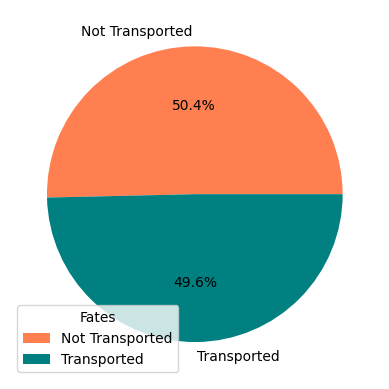

In [ ]:
# visualize labels
labels = ['Not Transported', 'Transported']

train_set['Transported'].value_counts().plot(kind='pie', labels=labels, colors=['coral', 'teal'], autopct='%1.1f%%')
plt.ylabel('')
plt.legend(title='Fates')

In [ ]:
#check destribution statistics on numerical data
num_set = train_set[num_cols]
num_set.describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Age,Expenses,FoodCost
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,224.687617,458.077203,173.729169,311.138778,304.854791,28.827930,1472.487559,682.764821
std,659.739364,1594.434978,597.417440,1124.675871,1133.259049,14.339054,2799.915709,1716.049314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,727.000000,12.000000
75%,78.000000,118.000000,45.000000,89.000000,71.000000,37.000000,1461.000000,691.000000
max,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000,79.000000,35987.000000,29813.000000


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

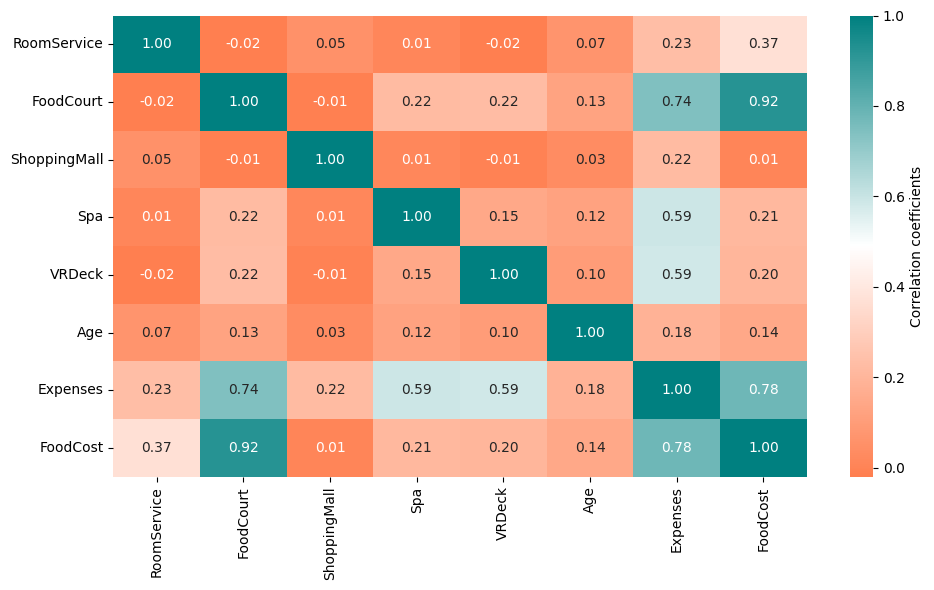

In [ ]:
#check correlation among numerical data
corr = num_set.corr() #check correlation
plt.figure(figsize=(10, 6)) #figure size
colors = ['coral', 'white', 'teal']
cmap = LinearSegmentedColormap.from_list('customer_coral_teal', colors)
sns.heatmap(corr, annot=True, fmt='.2f', cmap=cmap, cbar_kws={'label': 'Correlation coefficients'}) #visualize correlation
plt.tight_layout()

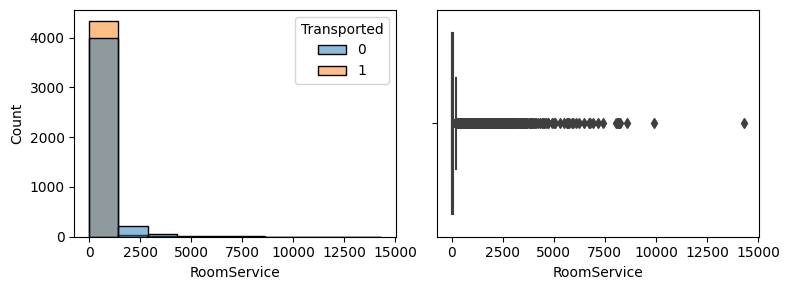

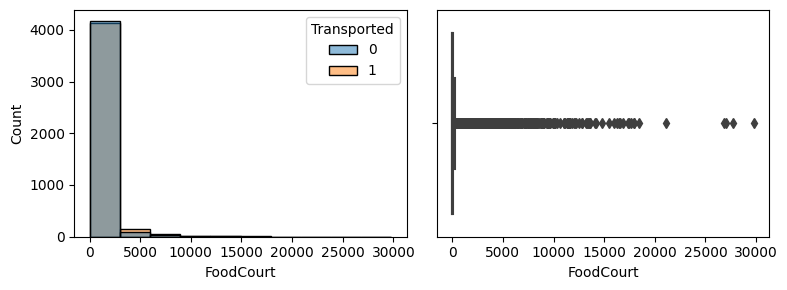

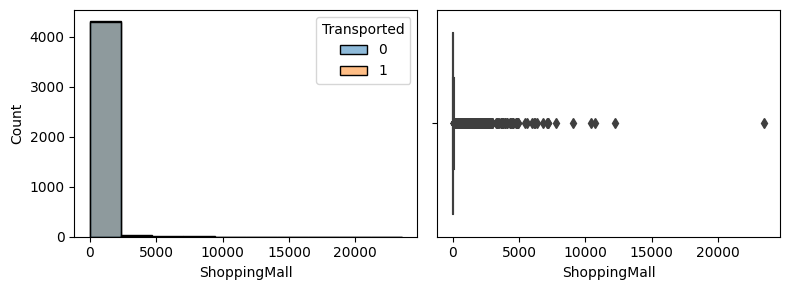

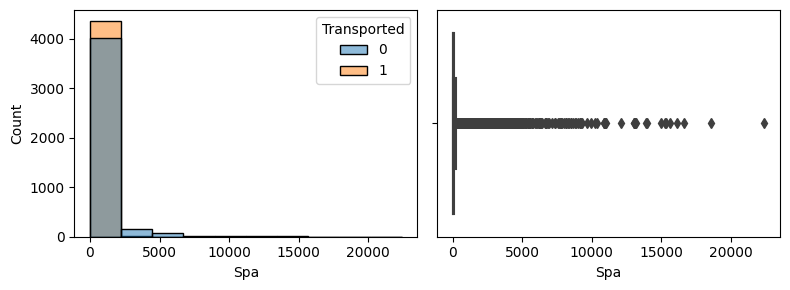

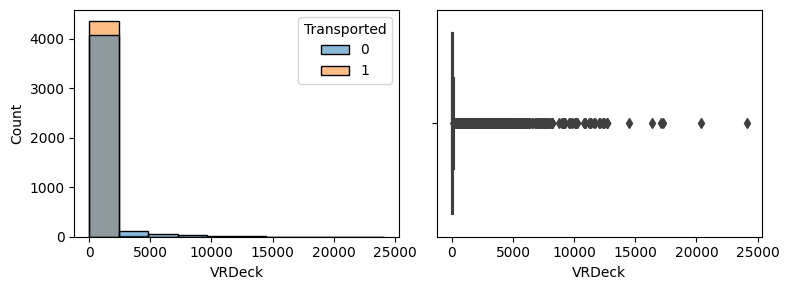

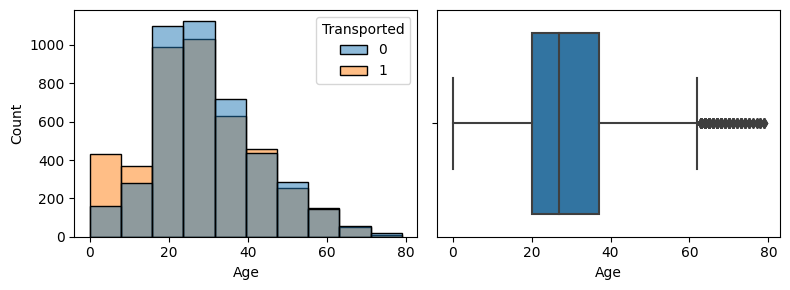

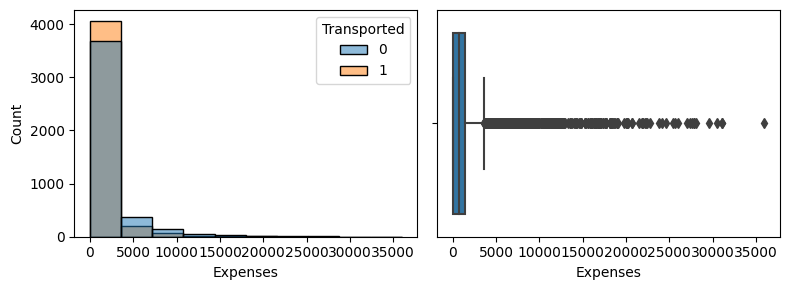

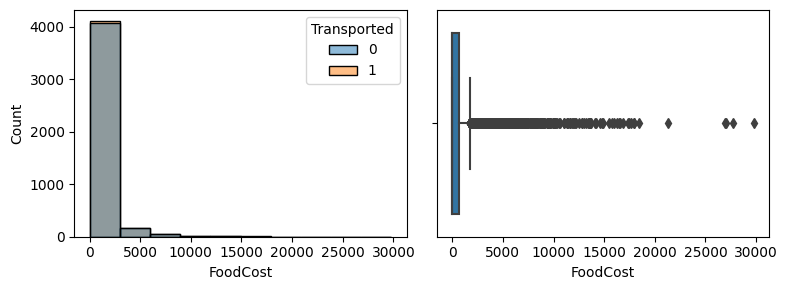

In [ ]:
# check distributions of numerical data
for col in num_set.columns:
    if col != 'Transported':
        _, axs = plt.subplots(1, 2, figsize=(8,3))
        sns.histplot(data=num_set, x=num_set[col], hue=train_set['Transported'].astype(dtype='int'), bins=10, ax=axs[0])
        sns.boxplot(data=num_set, x=num_set[col], hue=train_set['Transported'].astype(dtype='int'), ax=axs[1])
        plt.tight_layout()
    else:
        continue

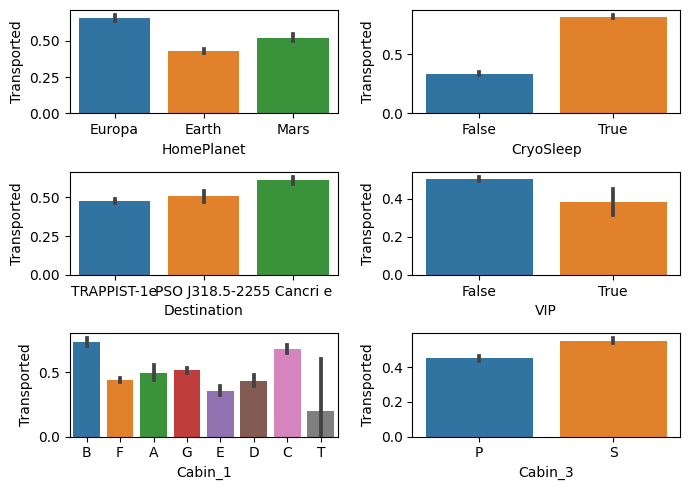

In [ ]:
#Check how each categorical feature relates to the target.
cat_set = train_set[cat_cols+transported]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(7, 5))
sns.barplot(data=cat_set, x='HomePlanet', y='Transported', ax=ax[0, 0])
sns.barplot(data=cat_set, x='CryoSleep', y='Transported', ax=ax[0,1])
sns.barplot(data=cat_set, x='Destination', y='Transported', ax=ax[1, 0])
sns.barplot(data=cat_set, x='VIP', y='Transported', ax=ax[1, 1])
sns.barplot(data=cat_set, x='Cabin_1', y='Transported', ax=ax[2, 0])
sns.barplot(data=cat_set, x='Cabin_3', y='Transported', ax=ax[2, 1])
plt.tight_layout()

Preprocessing and preparing datasets for training a model.

In [ ]:
# drop the label column
cat_set = cat_set.drop('Transported', axis=1)

In [ ]:
#Scale numerical data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

def scale_numericals(dataset):
    scaler.fit(dataset)
    scaled_numX = scaler.transform(dataset)
    return scaled_numX
scaled_numX = scale_numericals(num_set)

In [ ]:
#encode categorical data
def encode_categoricals(dataset):
    cat_cols = dataset.columns
    encoded_catX = pd.get_dummies(dataset, columns=cat_cols, dtype=int)
    return encoded_catX
encoded_catX = encode_categoricals(cat_set)

In [ ]:
new_cat_cols = list(encoded_catX.columns)

In [ ]:
#put together variables for a full training set
def reunite_set(nums, cats):
    X = np.concatenate((nums, cats), axis=1)
    return X
X = reunite_set(scaled_numX, encoded_catX.values)
y = train_set.Transported.astype('int').values

In [ ]:
np.isnan(X).sum()

0

Train and Validate a model

In [ ]:
#import modeling libraries
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
#train and test a logistic regression model
def xgb_classifier(X, y):
    kfolds = KFold(n_splits=3, shuffle=True, random_state=42)
    xgb = XGBClassifier()
    scores = cross_val_score(xgb, X, y, cv=kfolds, scoring='accuracy')
    print(scores)

In [ ]:
# initial scores
scores_v1 = xgb_classifier(X,y)
scores_v1

[0.79399586 0.80538302 0.80876769]


In [ ]:
# take out outliers
outlier_features = ['RoomService', 'ShoppingMall', 'VRDeck', 'Spa', 'Age', 'FoodCourt', 'Expenses']
from sklearn.ensemble import IsolationForest

isf = IsolationForest(n_estimators=300, random_state=42, n_jobs=-1, contamination=0.001)
isf.fit(train_set[outlier_features], train_set.Transported)
new_feature = pd.DataFrame(isf.predict(train_set[outlier_features]), columns=['New_Feature'])
kept_data = new_feature[new_feature['New_Feature']==1]

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


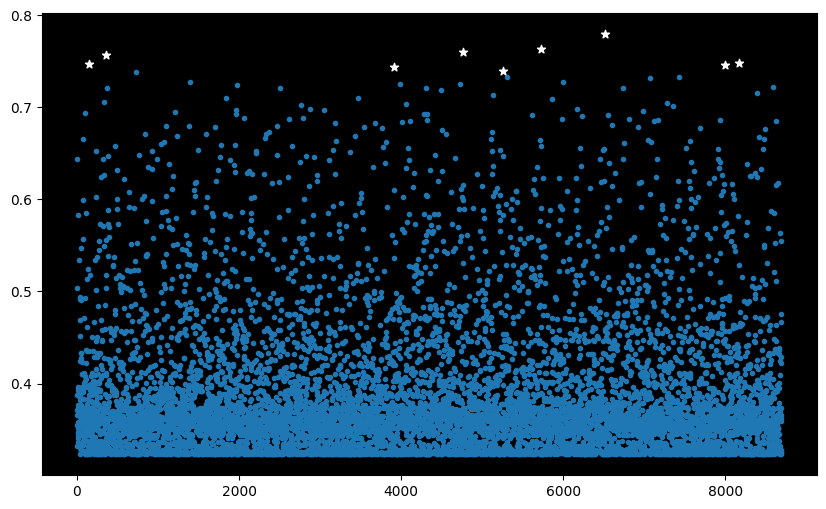

In [ ]:
# visualize dropped data points
import matplotlib.pyplot as plt

viz_data = pd.DataFrame()
viz_data['Score_Samples'] = - isf.score_samples(train_set[outlier_features])
viz_data['New_Feature'] = isf.predict(train_set[outlier_features])
kept = viz_data[viz_data['New_Feature']==1]
dropped = viz_data[viz_data['New_Feature']==-1]

fig,ax = plt.subplots(1, 1, figsize=(10,6))
ax.set_facecolor('black')
ax = plt.scatter(kept.index, kept['Score_Samples'], marker='.')
ax = plt.scatter(dropped.index, dropped['Score_Samples'], color='white', marker='*')

In [ ]:
all_cols = num_cols + new_cat_cols
X_df = pd.DataFrame(X, columns=all_cols)
y_df = train_set.Transported

In [ ]:
# check scores again
new_X = X_df.iloc[kept_data.index].reset_index(drop=True).values
new_y = y_df.iloc[kept_data.index].reset_index(drop=True).values
scores_v2 = xgb_classifier(new_X, new_y)
scores_v2

[0.81036269 0.79274611 0.7950933 ]


Removing outliers is only hurting the performance of this model.

In [ ]:
# check feature importances
from eli5.sklearn import PermutationImportance
import eli5

estimator = XGBClassifier()
perm = PermutationImportance(estimator, random_state=42, n_iter=10, cv=3).fit(X, y)
eli5.show_weights(perm, feature_names=all_cols, top=30)

In [ ]:
# drop unnecessary columns
drop_list = ['VIP_False', 'Destination_PSO J318.5-22', 'VIP_True', 'CryoSleep_True']

X = X_df.drop(drop_list, axis=1)

In [ ]:
X.shape

In [ ]:
# train a neural network
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [ ]:
# check model's accuracy
model.fit(X, y, validation_split=0.2, epochs=7)

In [ ]:
#prepare test set for prediction
test_set = fill_nan(test_set) #fill nan values with zero
test_set = engineer_features(dataset=test_set) # add new features
numericals, categoricals = test_set[num_cols], test_set[cat_cols] #split into numerical and categorical values
scaled_numX = scale_numericals(numericals) # scale numeric columns
encoded_catX = encode_categoricals(categoricals) #encode cat values
test_set = reunite_set(scaled_numX, encoded_catX) # concatenate numeric and categorical values again
test_set = pd.DataFrame(test_set, columns=all_cols) # recreate a full data frame
test_set = test_set.drop(drop_list, axis=1).values # drop unnecessary columns

In [ ]:
np.isnan(test_set).sum() #check null values in the test set

In [ ]:
#make a prediction
predictions = model.predict(test_set)
n_predictions = (predictions > 0.5).astype(bool)
submission = pd.DataFrame({"PassengerId": submission_id,
                          "Transported": n_predictions.squeeze()})

In [ ]:
#make a prediction
predictions = model.predict(test_set)
n_predictions = (predictions > 0.5).astype(bool)
submission = pd.DataFrame({"PassengerId": submission_id,
                          "Transported": n_predictions.squeeze()})

In [ ]:
submission.head()

In [ ]:
#prepare sample submission
sample_submission_df = pd.read_csv('/kaggle/input/spaceship-titanic/sample_submission.csv')
sample_submission_df['Transported'] = n_predictions
sample_submission_df.to_csv('/kaggle/working/submission.csv', index=False)
sample_submission_df.head()